# Introduction

This tutorial is about exploring and analyzing data from the College Scorecard. The College Scorecard is a part of the U.S. Department of Education. The goal of the scorecard is to make colleges more transparent by providing data sets about colleges around the United States. Students can see information about diversity, tuition, number of degrees per major, numbers of students, post-school salaries, and much more. This information is very helpful for people who are applying to college. It is important for prospecting students to try to get a personal understanding of potential colleges from the perspective of current students, as well as a fact-based understanding from reading up on data that has been left out of their college tours and brochures. Students can use the College Scorecard to compare and contrast the colleges of their choice in order to make sure they are picking the school that is right for them. The scorecard is also helpful for universities, because they can compare themselves to other schools and improve by replicating the techniques of the successful schools. 

Here is a link to the College Scorecard website: https://collegescorecard.ed.gov/

We will specifically look into diversity on college campuses. We will predict how diverse a school is based on its location, tuition, and other attributes. This will give us insight into which features attract people of different races. The data we are using was last updated on October 30th, 2018.



In [113]:
!pip install folium

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [114]:
import folium
import json
import os
import requests
import pandas as pd
import numpy as np
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from sklearn import linear_model

## Load Data
Load the data from the Most-Recent-Cohorts-All-Data-Elements CSV into a data frame and see the first 5 elements in the data with odata.head()

In [115]:
odata = pd.read_csv("Most-Recent-Cohorts-All-Data-Elements.csv")
odata.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,9,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1008,1009,1010,1011,1014,1015,1016,1017,1018,1019,1021,1022,1023,1027,1028,1029,1030,1031,1032,1034,1035,1036,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1065,1066,1067,1068,1069,1070,1071,1073,1074,1075,1076,1078,1079,1080,1081,1082,1083,1084,1086,1087,1088,1089,1091,1092,1093,1094,1095,1096,1097,1099,1100,1101,1102,1104,1105,1106,1107,1108,1109,1110,1112,1113,1114,1115,1118,1119,1121,1122,1123,1125,1127,1128,1131,1132,1134,1135,1136,1138,1140,1141,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1170,1171,1172,1173,1174,1175,1177,1178,1179,1180,1183,1184,1185,1186,1187,1188,1190,1192,1196,1199,1200,1201,1209,1212,1213,1214,1222,1223,1224,1225,1226,1227,1235,1236,1237,123

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP6_FTNFT_POOLED_SUPP,OMAWDP8_FTNFT_POOLED_SUPP,OMENRYP8_FTNFT_POOLED_SUPP,OMENRAP8_FTNFT_POOLED_SUPP,OMENRUP8_FTNFT_POOLED_SUPP,OMAWDP6_PTNFT_POOLED_SUPP,OMAWDP8_PTNFT_POOLED_SUPP,OMENRYP8_PTNFT_POOLED_SUPP,OMENRAP8_PTNFT_POOLED_SUPP,OMENRUP8_PTNFT_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,0.4694,0.5136,0.0034,0.1429,0.3401,0.3333,0.3333,0,0,0.6667
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,0.6117,0.624,0.0075,0.2166,0.1519,0.3642,0.4,0.0434,0.2755,0.2811
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.5503,0.5562,0.0059,0.4379,0,0.4429,0.4714,0.0429,0.4857,0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.5456,0.5651,0.0123,0.2841,0.1385,0.3378,0.3547,0.0236,0.4257,0.1959
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.4105,0.429,0.0062,0.216,0.3488,0.2931,0.3103,0.0345,0.3966,0.2586


## Select Relevant Columns
Select the specific columns from the data you would like to focus on. The table has 1,899 columns. Here we focus on institution name, city, state abbreviation, longitude, latitiude, all boy schools, all girl schools, admission rate, in-state tuition, out-of-state tuition, and the number of undergraduates. The full names of the abbreviated column headings can be found in the data dictionary which can be downloaded from the "datadictionary" link under the Data Documentation heading on the right hand side of this webpage: https://collegescorecard.ed.gov/data/

In [116]:
# Choose specific columns to display
ndata = odata[['INSTNM', 'CITY', 'STABBR', 'LONGITUDE', 'LATITUDE', 'MENONLY', 'WOMENONLY','ADM_RATE', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI']]
# made a sample of the orignal data set
ndata.head()

,INSTNM,CITY,STABBR,LONGITUDE,LATITUDE,MENONLY,WOMENONLY,ADM_RATE,TUITIONFEE_IN,TUITIONFEE_OUT,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI
0,Alabama A & M University,Normal,AL,-86.568502,34.783368,0.0,0.0,0.8738,9366.0,17496.0,4616.0,0.0256,0.9129,0.0076,0.0019,0.0024,0.0017
1,University of Alabama at Birmingham,Birmingham,AL,-86.799345,33.505697,0.0,0.0,0.5814,8040.0,18368.0,12047.0,0.5786,0.2626,0.0309,0.0598,0.0028,0.0004
2,Amridge University,Montgomery,AL,-86.174010,32.362609,0.0,0.0,NaN,7180.0,7180.0,293.0,0.1570,0.2355,0.0068,0.0000,0.0000,0.0034
3,University of Alabama in Huntsville,Huntsville,AL,-86.640449,34.724557,0.0,0.0,0.7628,9842.0,20612.0,6346.0,0.7148,0.1131,0.0411,0.0414,0.0120,0.0000
4,Alabama State University,Montgomery,AL,-86.295677,32.364317,0.0,0.0,0.4590,9220.0,16156.0,4704.0,0.0138,0.9337,0.0111,0.0028,0.0013,0.0004


## Tidy Data

The "MENONLY" and "WOMANONLY" columns were not tidy, because they could easily be combined into one column to reduce the amount of 0.0 values that appear. The columns are combined into one "GENDER" column.

In [117]:
#TIDY
gender = []
for index, row in ndata.iterrows():
    if np.isnan(row ['WOMENONLY']) | np.isnan(row ['MENONLY']):
          gender.append(float('nan'))
    elif (row ['WOMENONLY'] == 1.) & (row ['MENONLY'] == 0.):
        gender.append('WOMENONLY')
    elif (row ['MENONLY'] == 1.) & (row ['WOMENONLY'] == 0.):
        gender.append('MENONLY')
    else:# (row ['WOMENONLY']) == 0. & (row ['MENONLY']) == 0.:
         gender.append('CO-ED')

ndata = ndata.drop(columns=['WOMENONLY', 'MENONLY'])
ndata['GENDER']= gender

ndata

,INSTNM,CITY,STABBR,LONGITUDE,LATITUDE,ADM_RATE,TUITIONFEE_IN,TUITIONFEE_OUT,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,GENDER
0,Alabama A & M University,Normal,AL,-86.568502,34.783368,0.8738,9366.0,17496.0,4616.0,0.0256,0.9129,0.0076,0.0019,0.0024,0.0017,CO-ED
1,University of Alabama at Birmingham,Birmingham,AL,-86.799345,33.505697,0.5814,8040.0,18368.0,12047.0,0.5786,0.2626,0.0309,0.0598,0.0028,0.0004,CO-ED
2,Amridge University,Montgomery,AL,-86.174010,32.362609,NaN,7180.0,7180.0,293.0,0.1570,0.2355,0.0068,0.0000,0.0000,0.0034,CO-ED
3,University of Alabama in Huntsville,Huntsville,AL,-86.640449,34.724557,0.7628,9842.0,20612.0,6346.0,0.7148,0.1131,0.0411,0.0414,0.0120,0.0000,CO-ED
4,Alabama State University,Montgomery,AL,-86.295677,32.364317,0.4590,9220.0,16156.0,4704.0,0.0138,0.9337,0.0111,0.0028,0.0013,0.0004,CO-ED
5,The University of Alabama,Tuscaloosa,AL,-87.545978,33.211875,0.5259,10470.0,26950.0,31663.0,0.7841,0.1037,0.0437,0.0118,0.0036,0.0009,CO-ED
6,Central Alabama Community College,Alexander City,AL,-85.945266,32.924780,NaN,4380.0,7890.0,1492.0,0.6877,0.2802,0.0127,0.0020,0.0040,0.0007,CO-ED
7,Athens State University,Athens,AL,-86.964698,34.806793,NaN,NaN,NaN,2888.0,0.7784,0.1250,0.0215,0.0076,0.0142,0.0010,CO-ED
8,Auburn University at Montgomery,Montgomery,AL,-86.177544,32.367360,0.7659,9640.0,20710.0,4171.0,0.5126,0.3627,0.0141,0.0247,0.0060,0.0010,CO-ED
9,Auburn University,Auburn,AL,-85.488258,32.599378,0.8054,10696.0,28840.0,22095.0,0.8285,0.0673,0.0335,0.0252,0.0052,0.0003,CO-ED


## Exploratory Data Analysis

### Map
This is a map of a sample of 1,000 randomly selected institutions in the data set.

In [133]:
#Use folium to create a map
#Set the starting view location with the latitude and longitude and how zoomed in you would like it to be 
map_osm = folium.Map(location=[39.29, -100.61], zoom_start=4)

#Use the .sample function and set the size to 1,000 to generate a random selection of 1,000 rows from the ndata dataframe
sdata = ndata.sample(n = 1000)

#Use the .dropna function to remove any nan values from the Lattitude and Longitude columns.
noNaN = sdata.dropna(subset = ['LATITUDE', 'LONGITUDE'])

#Itterate though each row of institutions and add them to the map one by one
#Set specific characteristics, such as color, shape, size, for the points with the variables bellow
for index, row in noNaN.iterrows():   
    color= 'black'
    folium.Circle(
    radius=1000,
    location=[row['LATITUDE'], row['LONGITUDE']],
    color=color,
    fill=True,
    tooltip = row['INSTNM']
).add_to(map_osm)
    
map_osm

#### State vs. Admission Rate
This is a bar graph of the average admission rate per state. The rows with missing institution names and admission rates were dropped. 

In [119]:
#Use the .dropna function to remove any nan values from the institution names and admission rates columns
admissions = data.dropna(subset = ['INSTNM', 'ADM_RATE'])

#Group by state and use the .mean() function on the undergraduates and admission rates columns to get the
# average admission rate and averagenumber of undergraduates per state
admissions= admissions.groupby(['STABBR'], as_index=False)['ADM_RATE', 'UGDS'].mean()
admissions.head()

,STABBR,ADM_RATE,UGDS
0,AK,0.650850,4641.000000
1,AL,0.638853,4839.566667
2,AR,0.697232,4154.105263
3,AZ,0.676111,10085.736842
4,CA,0.612773,5656.950704


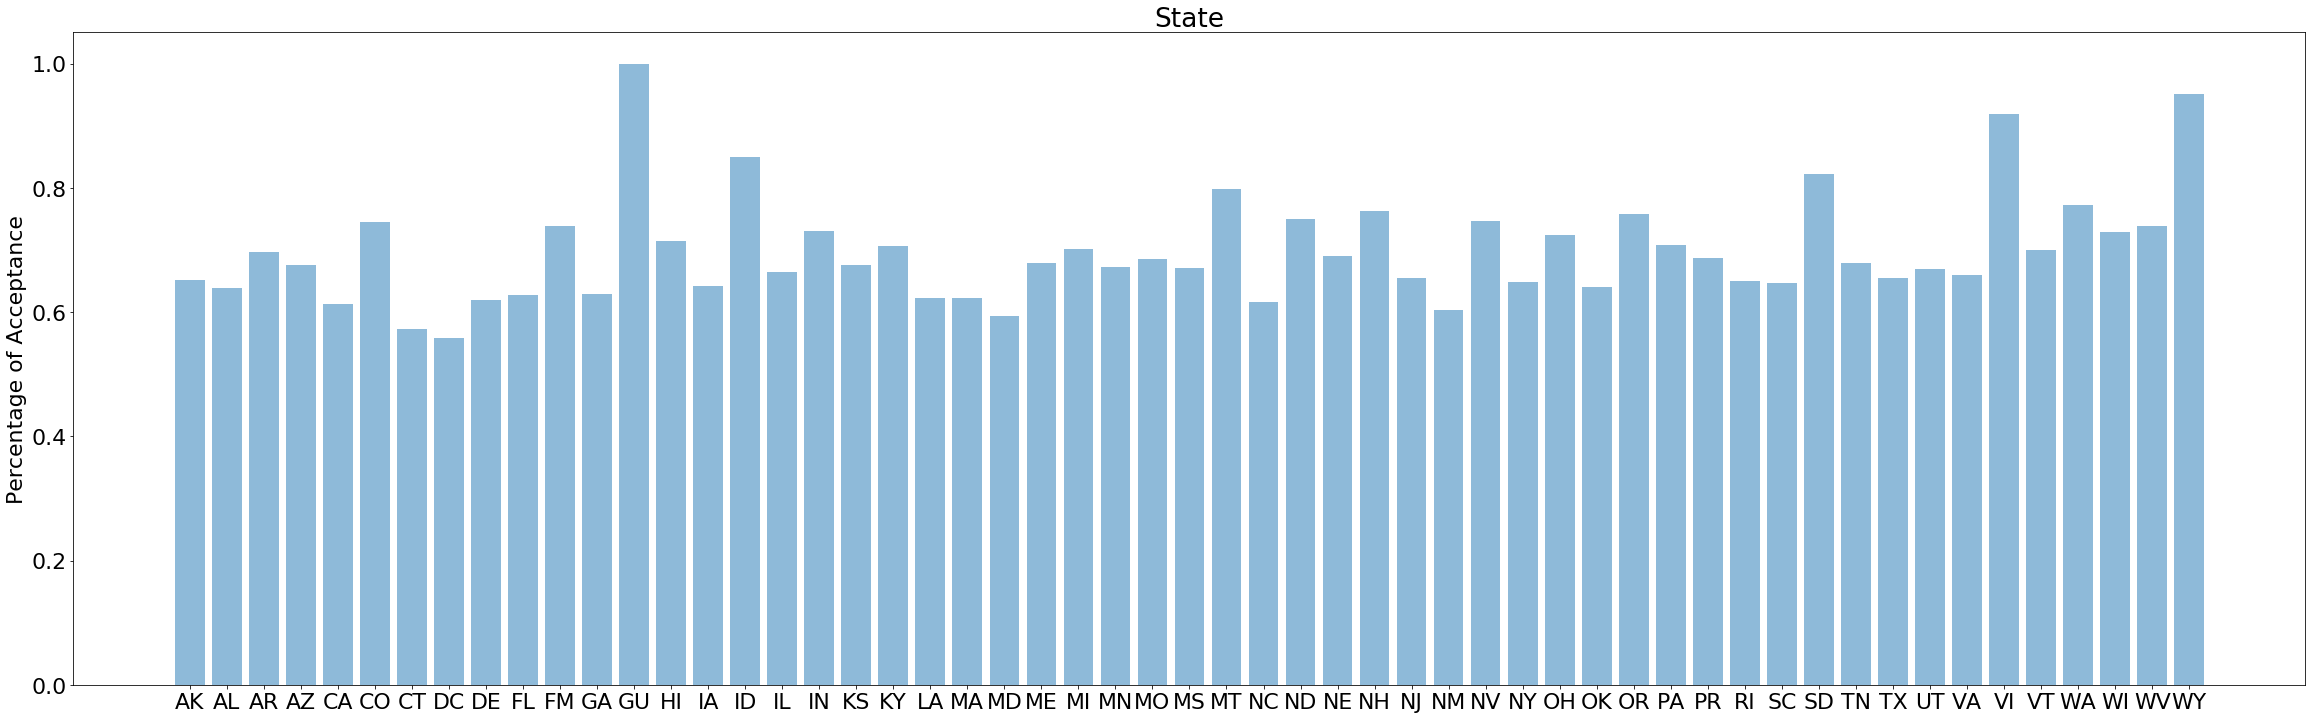

In [136]:
plt.figure(num=None, figsize=(40, 12))
x = admissions['STABBR']
y = admissions['ADM_RATE']

plt.rcParams.update({'font.size': 22})

#Use matplotlib.pyplot's bar function to create a bar graph of the acceptance rate vs the state
plt.bar(x, y, align='center', alpha=0.5)

#Set the axes titles
plot.set_title("State vs Acceptance Rate")
plot.set_xlabel("State")
plt.ylabel('Percentage of Acceptance')

plt.show()

### State vs In-State Tuition
This is a bar graph of the average in-state tuition price per state. The rows with missing in-state tuition prices were dropped. 

7175

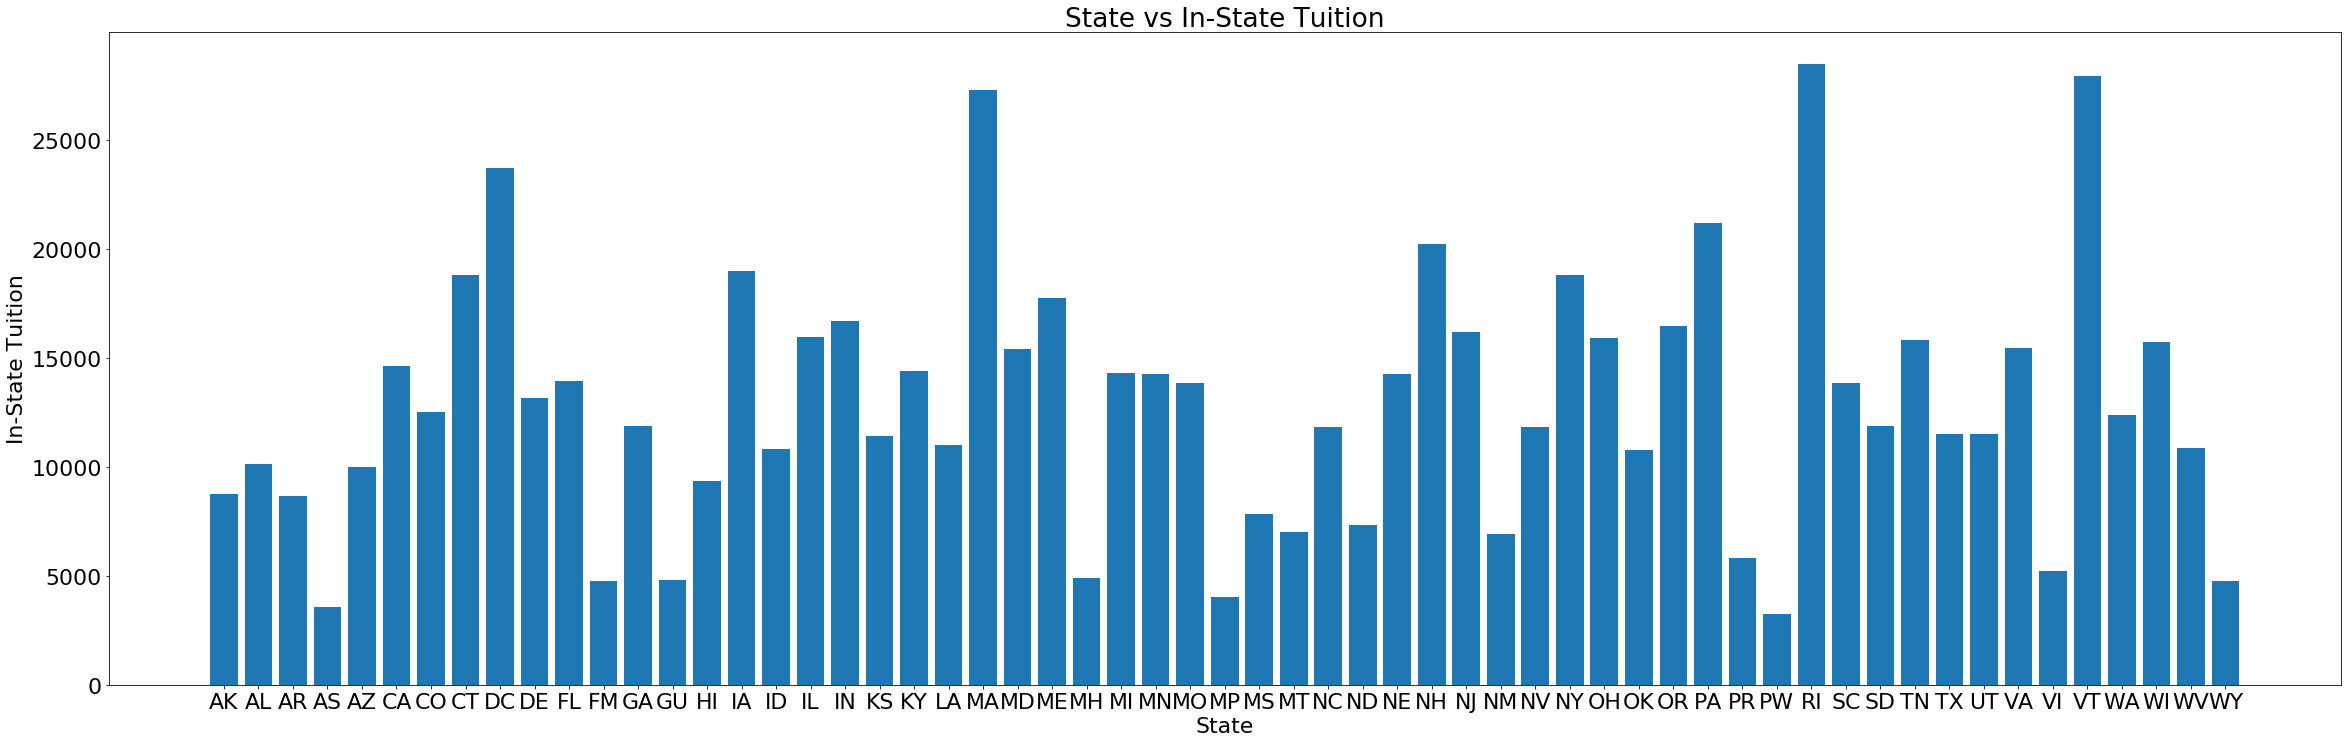

In [121]:
fig = plt.figure(figsize=(40,12))  
plot = fig.add_subplot(1,1,1) 

#Use the .dropna function to remove any nan values from the tuition-in column
tuition = ndata.dropna(subset = ['TUITIONFEE_IN'])

#Create an array of the State Abbreviations to use for the horizontal axis of the graphs 
State_Abbr = []
for ele, df in tuition.groupby('STABBR'):
    State_Abbr.append(str(ele)) 

#Generate the tuition averages for each state by summing the the values of the tuitionfee-in array and 
#dividing my the number of values
tuition_averages = []
for b, df in tuition.groupby('STABBR'):
    t = df['TUITIONFEE_IN'].sum()
    c = len(df['TUITIONFEE_IN'])
    tuition_averages.append(t/c)
    
#Use matplotlib.pyplot's bar function to create a bar graph of the in-state tuition vs the state  
x_pos = [i for i, _ in enumerate(State_Abbr)]
plt.bar(State_Abbr, tuition_averages)

#Set the axes titles
plot.set_title("State vs In-State Tuition")
plot.set_xlabel("State")
plot.set_ylabel("In-State Tuition")
plt

len(ndata['TUITIONFEE_IN'])

### State vs Race
Here are 6 bar graphs of the average percentage of Whites, Blacks, Hispanicsm American Indians & Alaska Natives, and Native Hawaiians & Pacifc Islanders per state. The rows with missing races were dropped. 

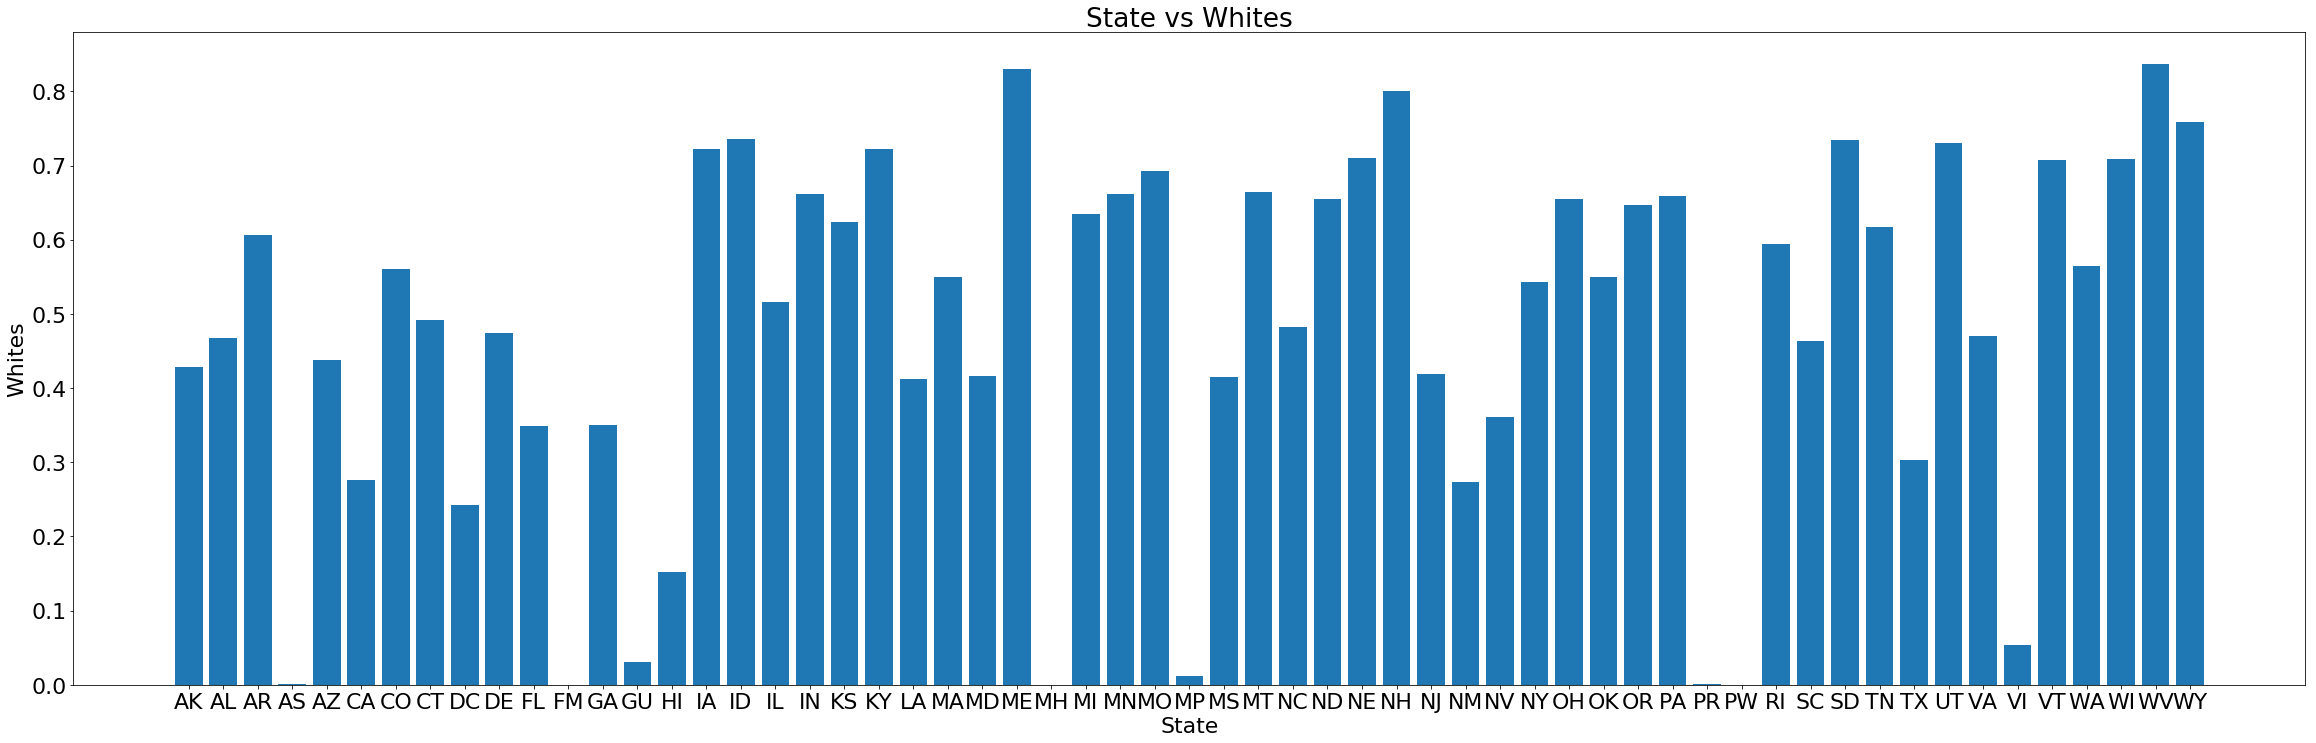

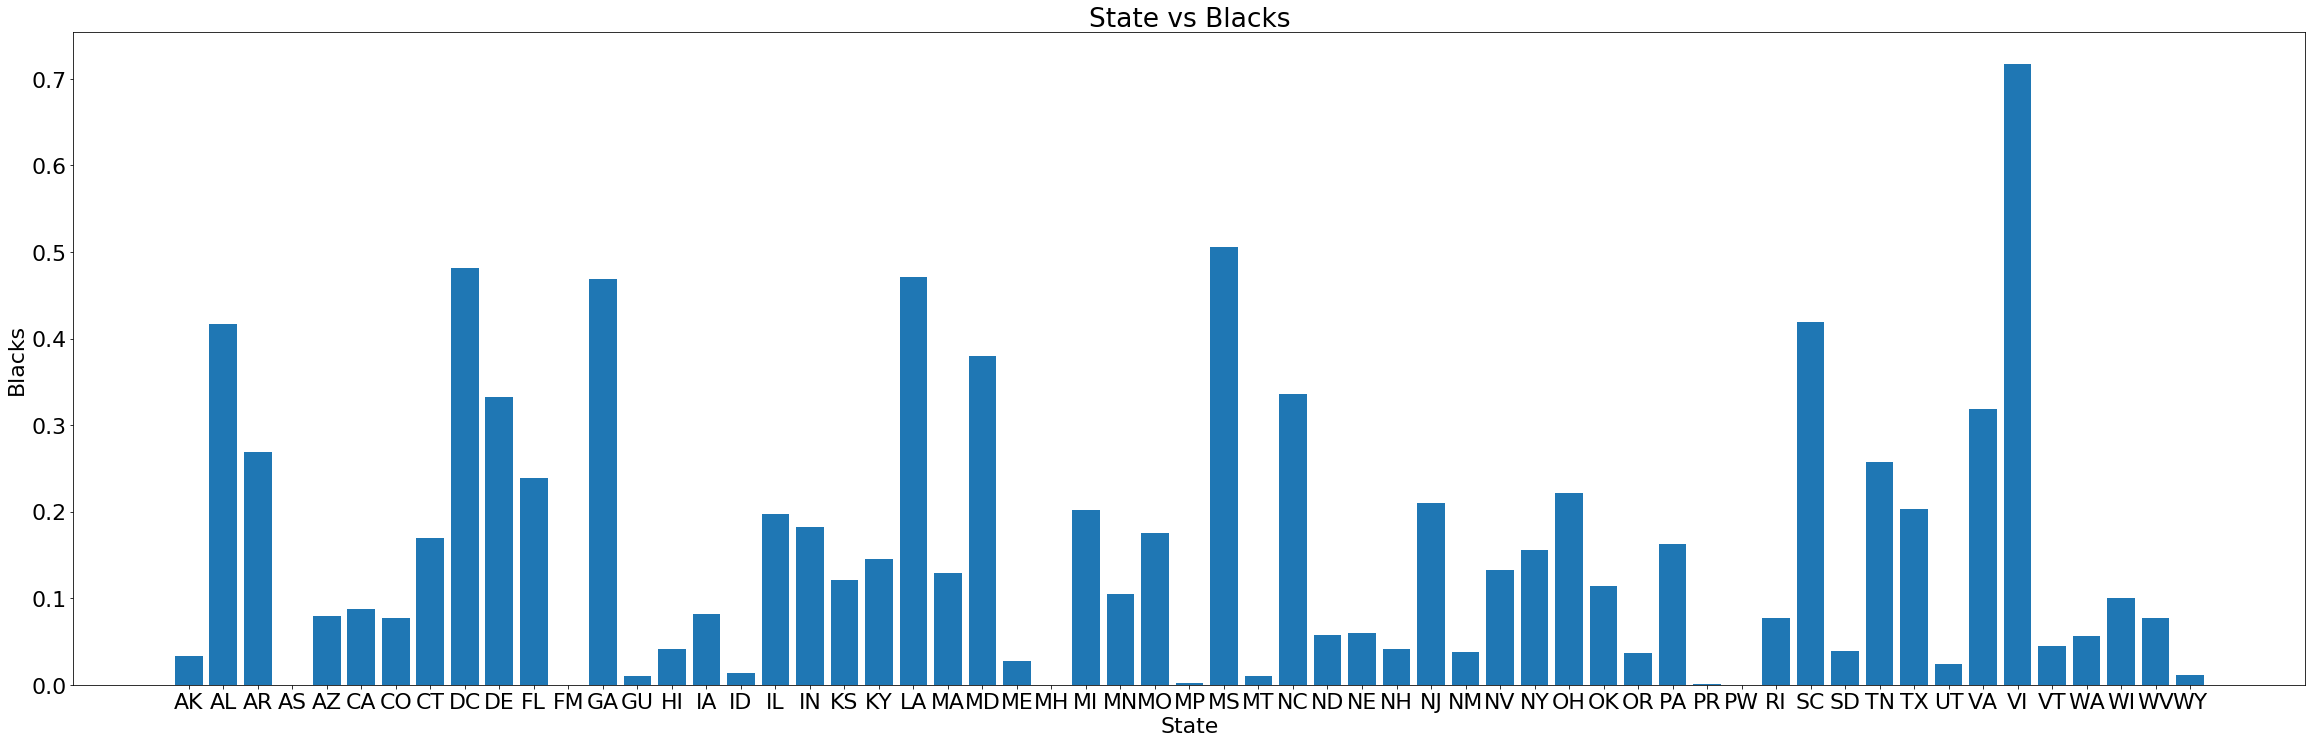

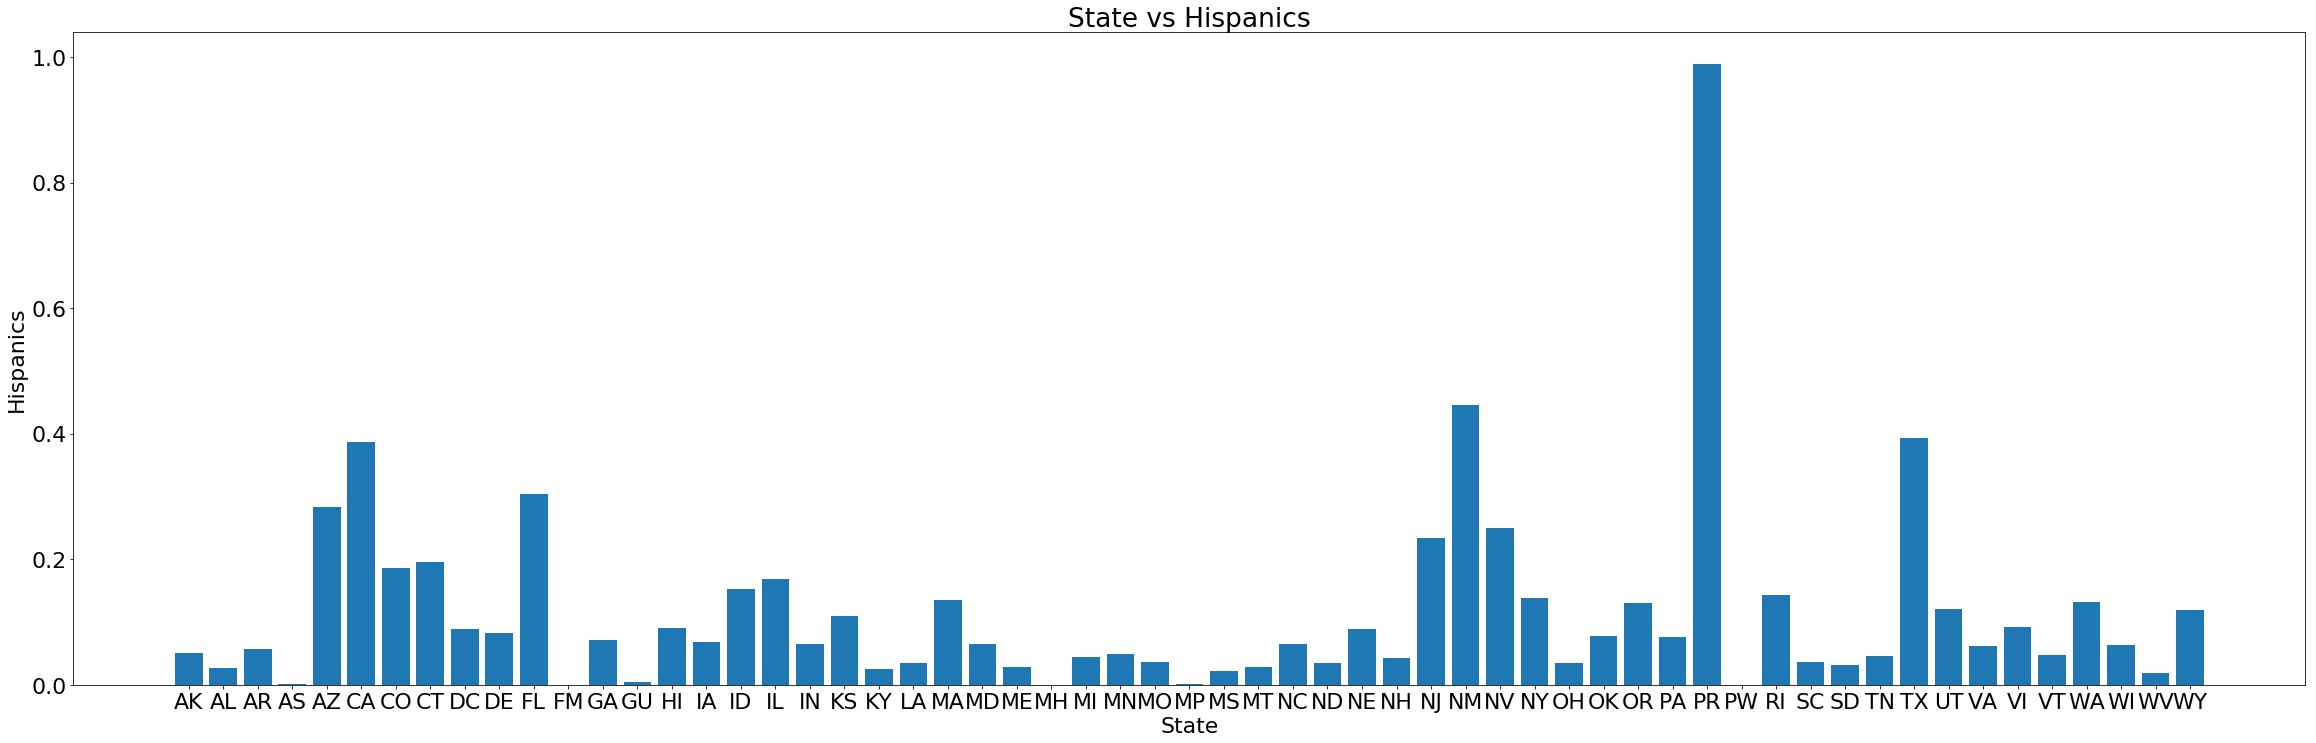

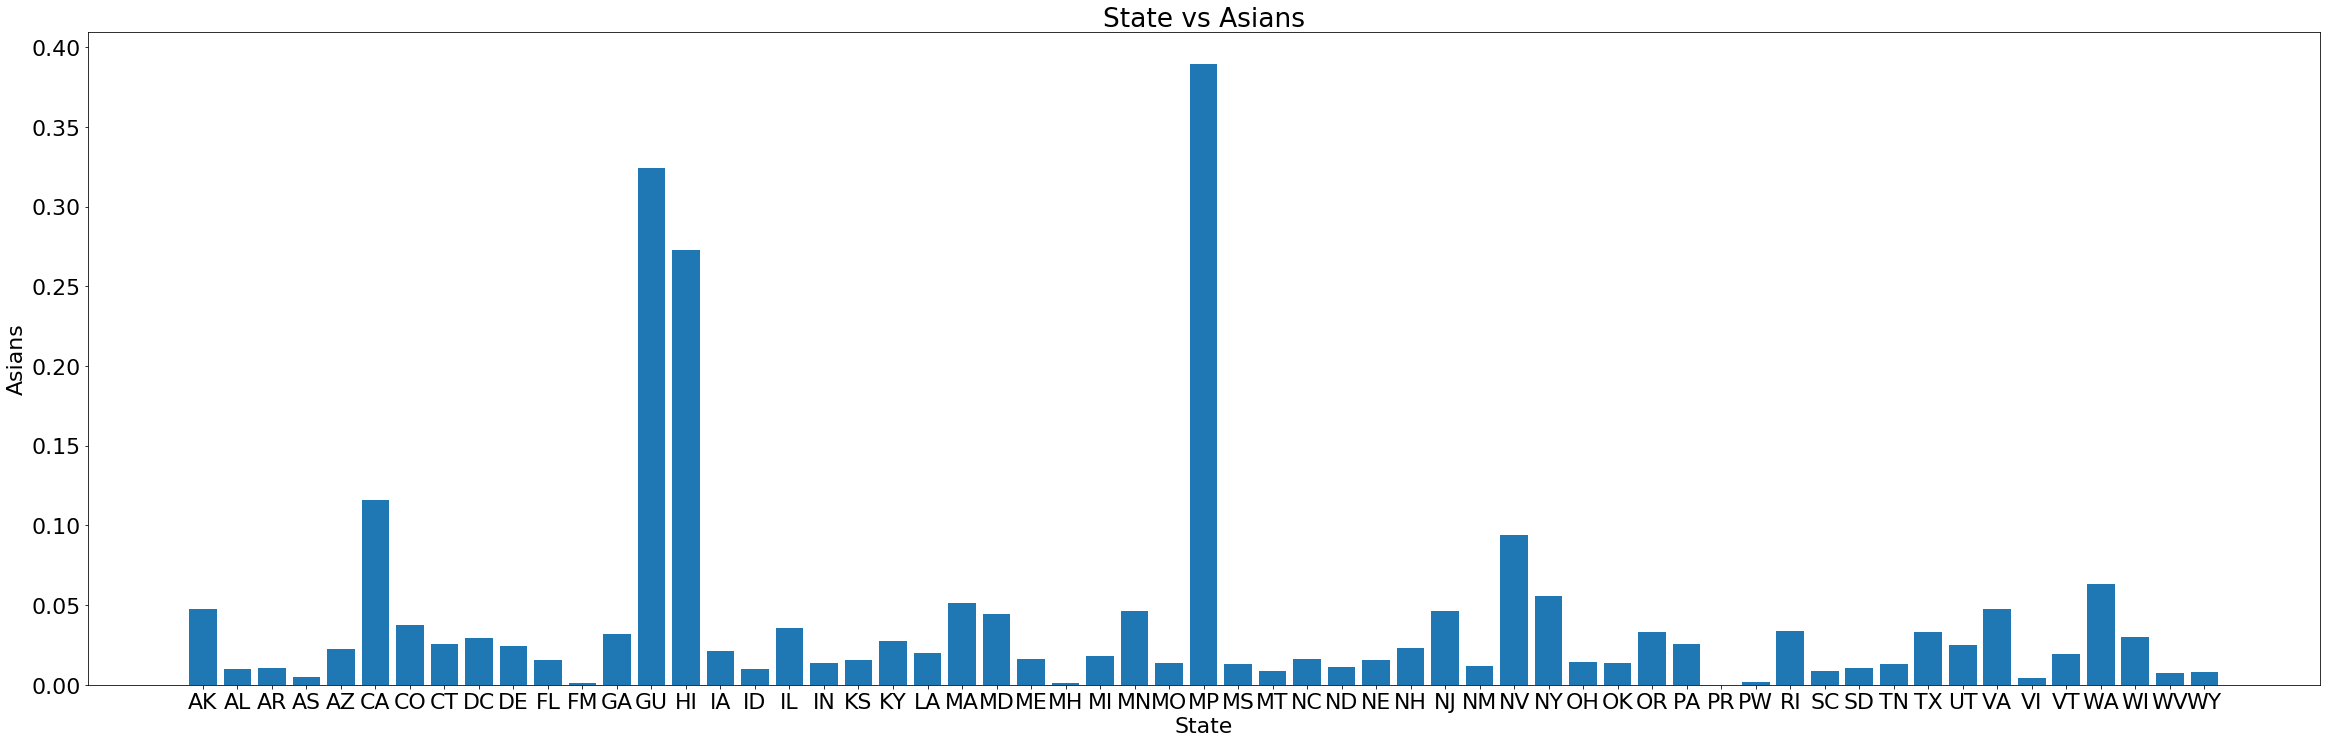

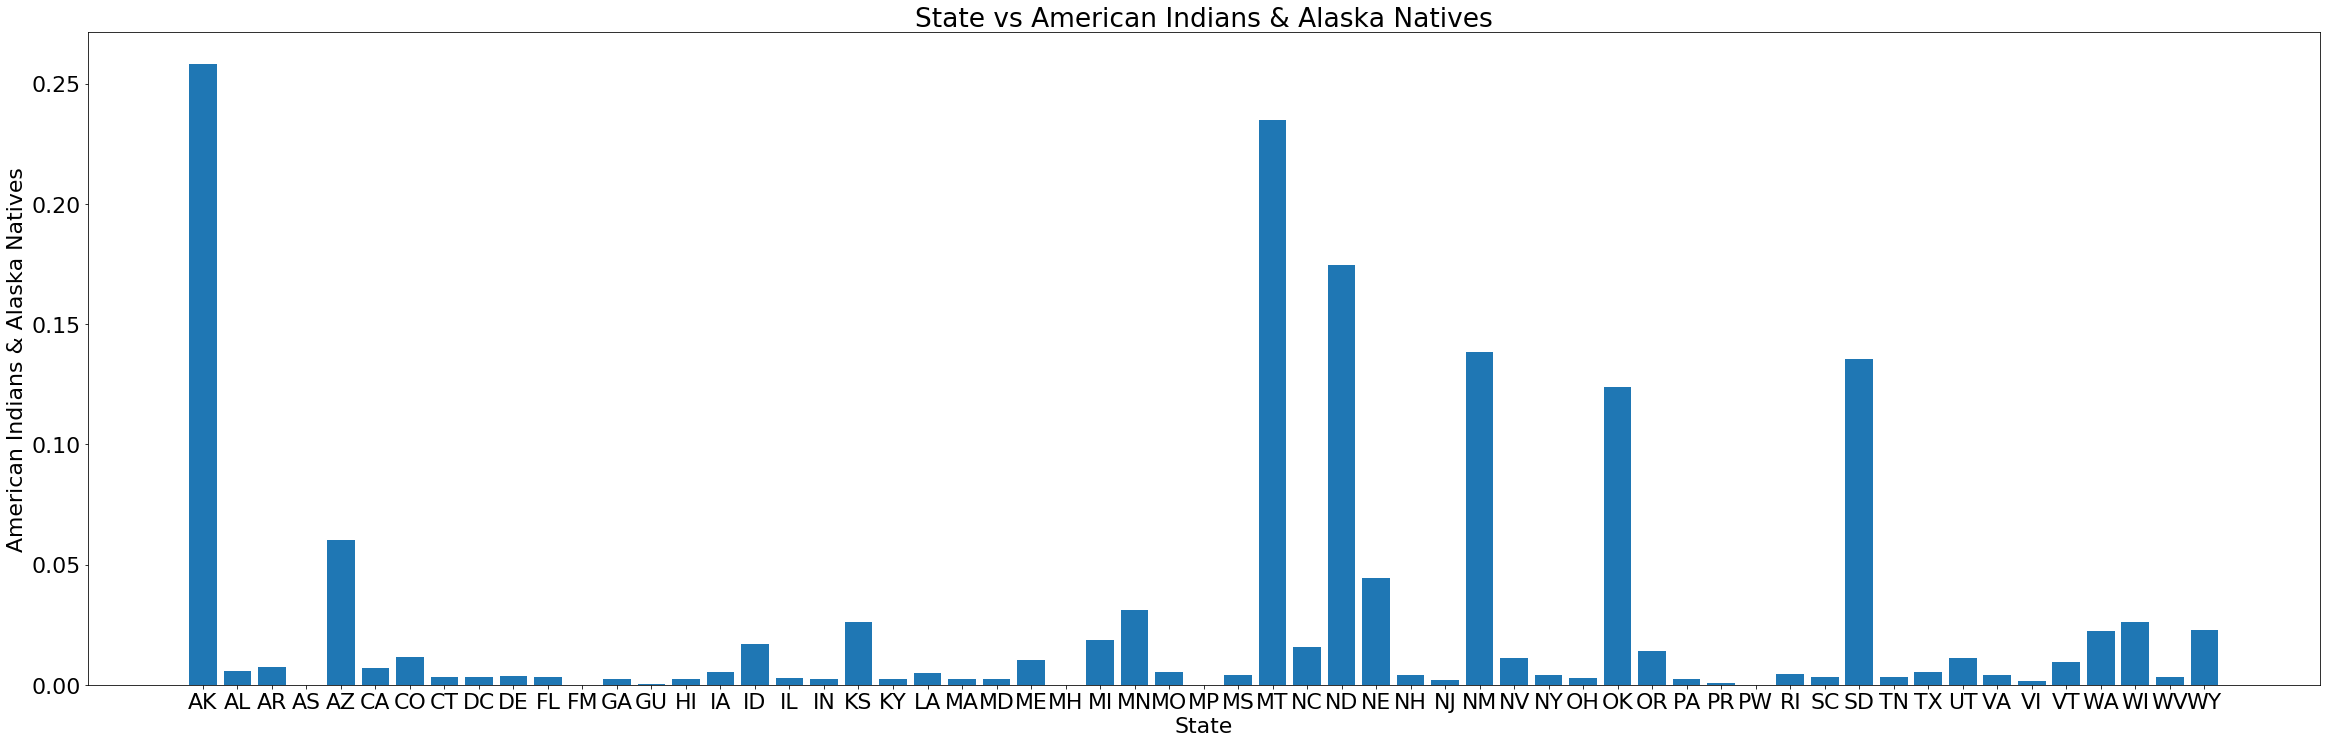

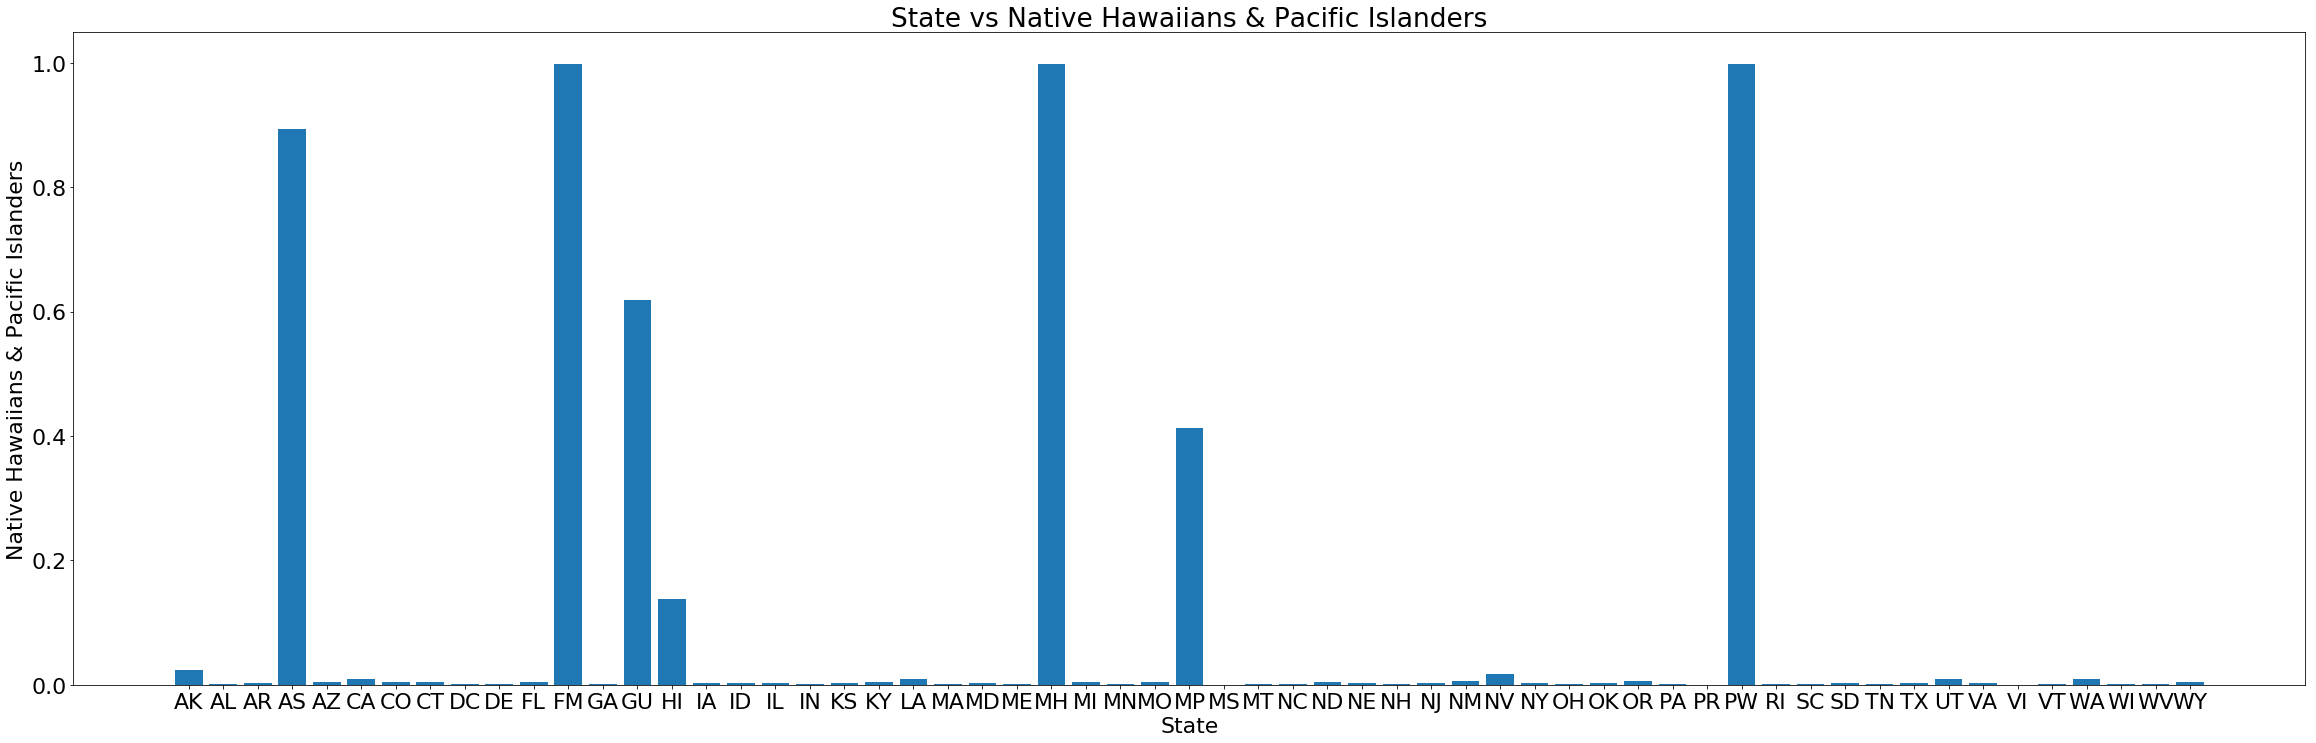

In [137]:

raceNames = ["Whites", "Blacks", "Hispanics", "Asians", "American Indians & Alaska Natives", "Native Hawaiians & Pacific Islanders"]
races = ['UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI']
for j in range (6):

    #Use the .dropna function to remove any nan values from the race columns
    race = ndata.dropna(subset = ['INSTNM', races[j]])

    fig = plt.figure(figsize=(40,12))  
    plot = fig.add_subplot(1,1,1) 
    
    #Generate the race percentage averages for each state by summing the the values of the current race array and 
    #dividing my the number of values
    race_averages = []
    for b, df in race.groupby('STABBR'):
        t = df[races[j]].sum()
        c = len(df[races[j]])
        race_averages.append(t/c)

    #Use matplotlib.pyplot's bar function to createa bar graph of the race vs the state
    plt.bar(State_Abbr, race_averages)
    
    #Set the axes titles
    plot.set_title("State vs " + raceNames[j])
    plot.set_xlabel("State")
    plot.set_ylabel(raceNames[j])
    plt
    

### State vs Gender
Here are 3 bar graphs of the number of all women schools, all men schools, and all co-ed schools per state. The rows with missing gender values were dropped.

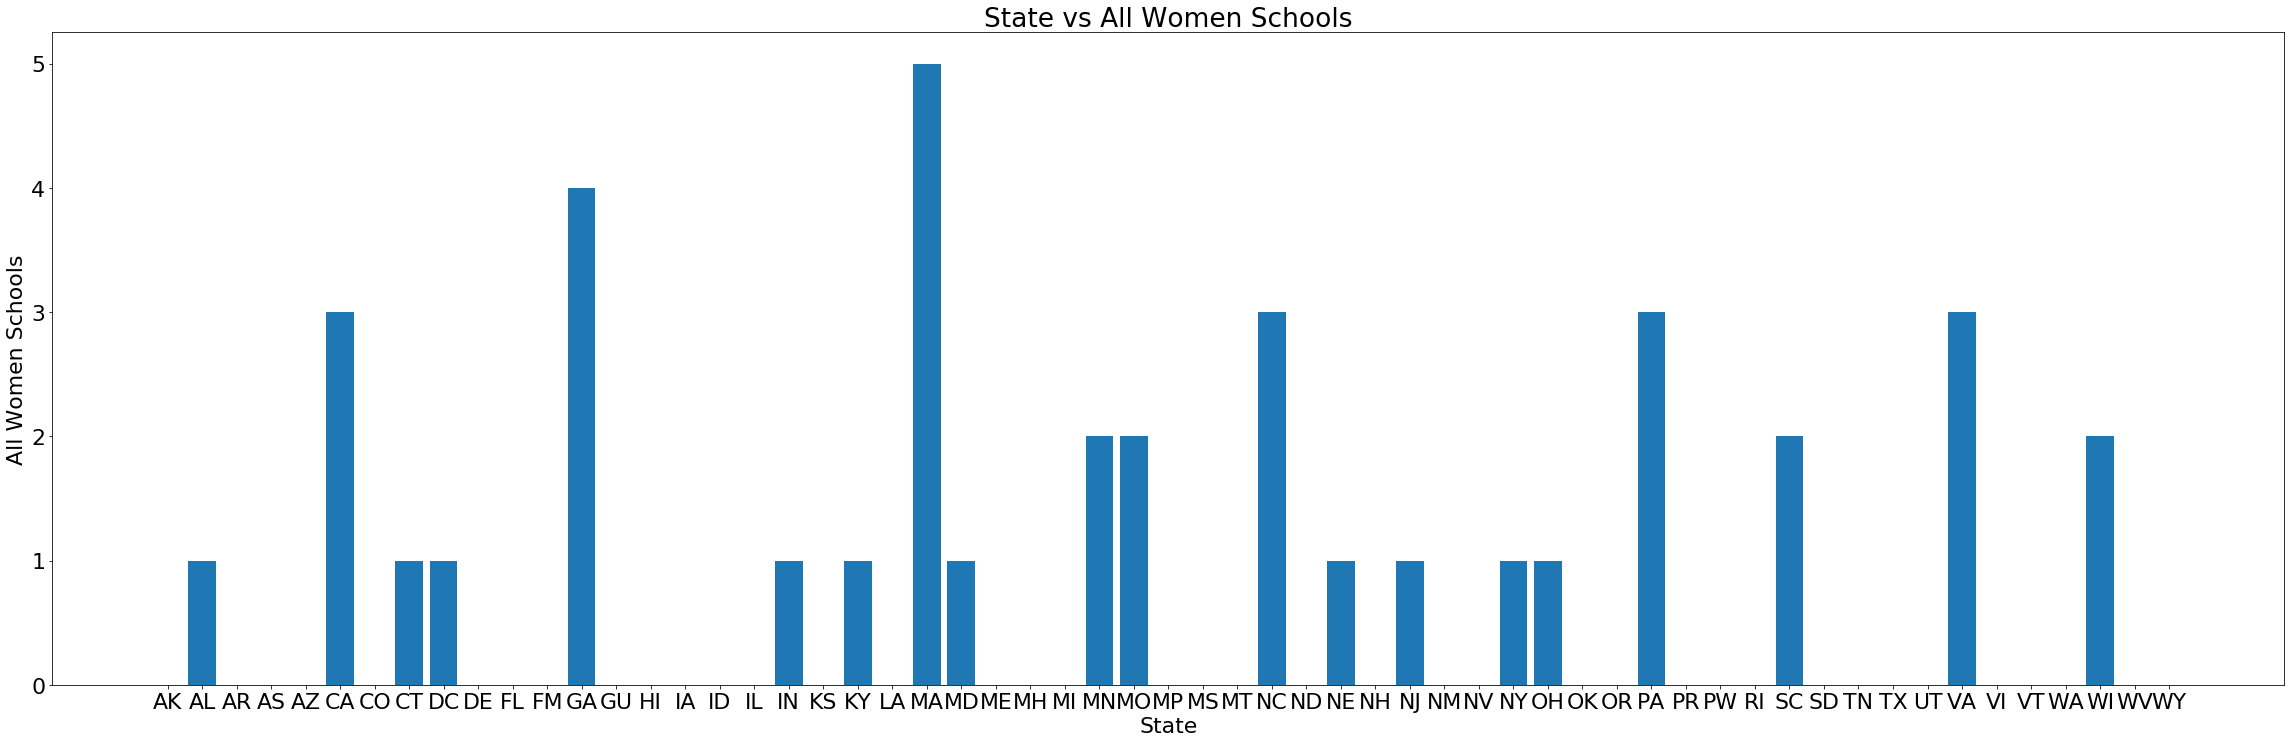

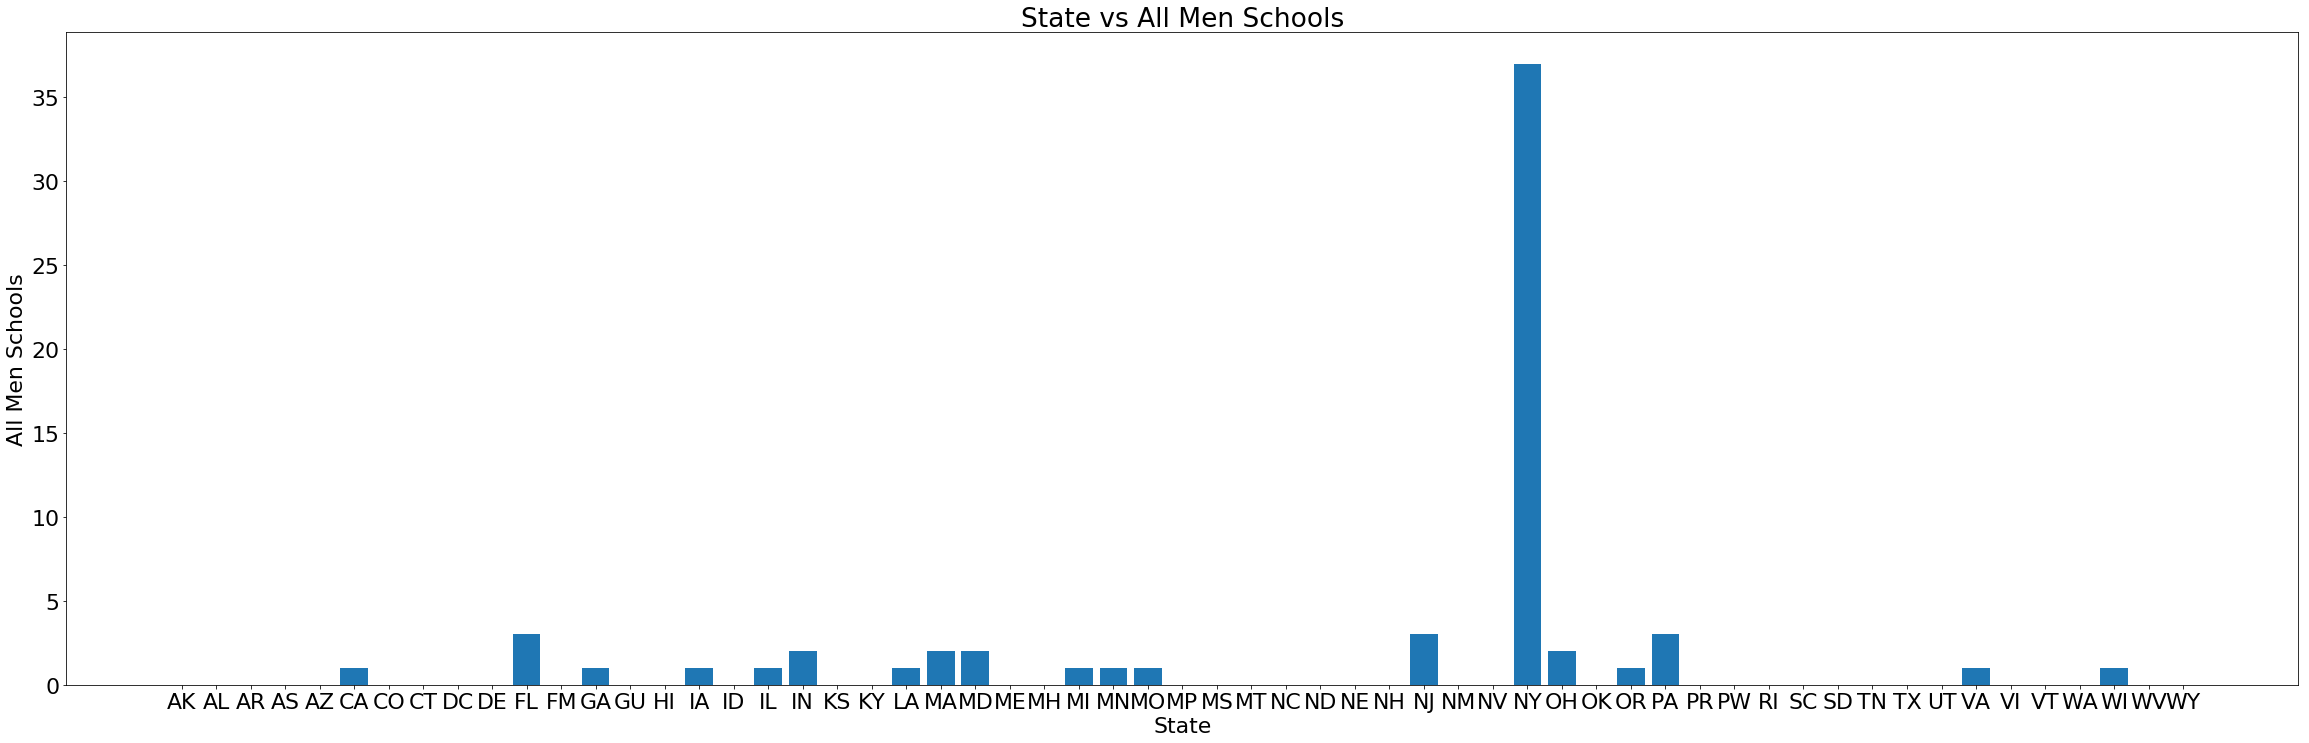

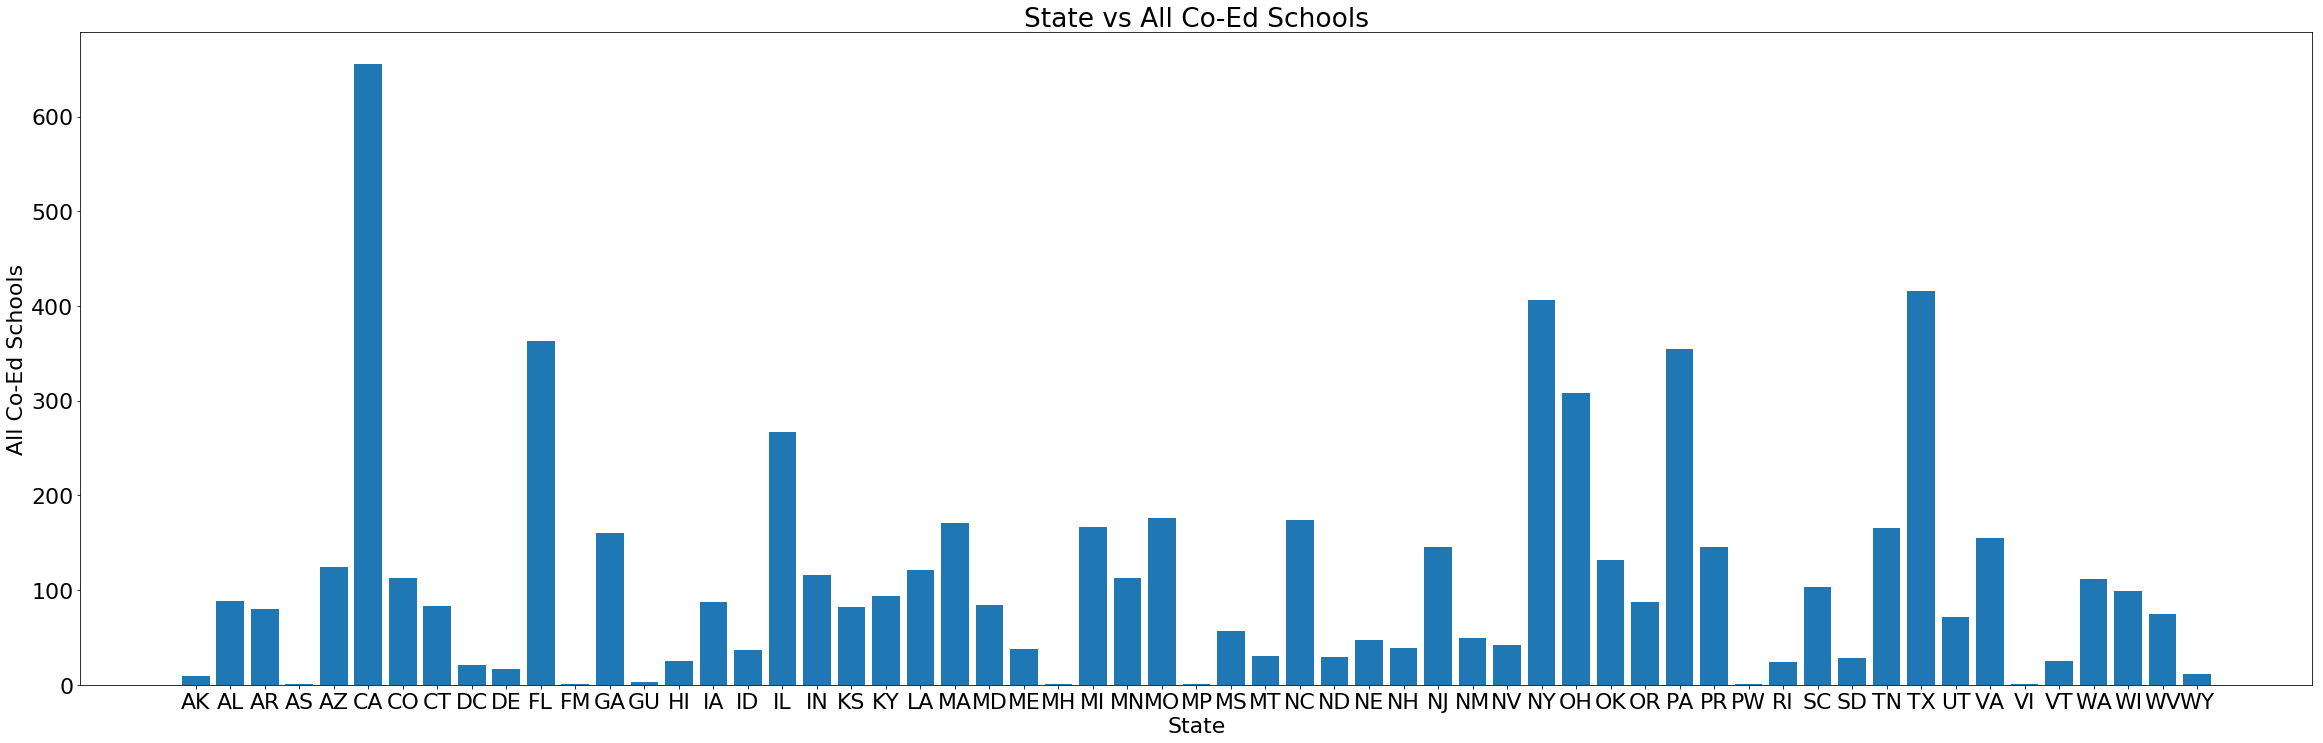

In [130]:
#Use the .dropna function to remove any nan values from the gender columns
gender = ndata.dropna(subset = ['GENDER'])
genderNames = ["All Women Schools", "All Men Schools", "All Co-Ed Schools"]
genders = ['WOMENONLY', 'MENONLY', "CO-ED"]
for j in range (3):

    fig = plt.figure(figsize=(40,12))  
    plot = fig.add_subplot(1,1,1) 

    
    #Generate the number of gender specific schools in each state by summing the values of the current gender array and 
    #dividing my the number of values
    gender_count = []
    for b, df in ndata.groupby('STABBR'):
        count = 0
        for i in (df["GENDER"]):
            if i == genders[j]:
                count = count +  1
        gender_count.append(count)

    #Use matplotlib.pyplot's bar function to createa bar graph of the gender vs the state
    plt.bar(State_Abbr, gender_count)
    
    #Set the axes titles
    plot.set_title("State vs " + genderNames[j])
    plot.set_xlabel("State")
    plot.set_ylabel(genderNames[j])
    plt


## Conclusion